# TRABAJO GRUPAL ANÁLISIS MULTIVARIANTE
### Global poverty and inequality dataset

**Kaggle link**: https://www.kaggle.com/datasets/utkarshx27/global-poverty-and-inequality-dataset/data?select=pip_codebook.csv

Mapa del mundo coloreable: https://naturaldisasters.ai/posts/python-geopandas-world-map-tutorial/

### Tabla de Contenidos: <a class="anchor" id="index"></a>

<div class="alert" style="margin-top: 20px">

1. [Cargar datos e importar librerías](#seccion_1)<br>

2. [Análisis e imputación de datos perdidos](#seccion_2)<br>

3. [Análisis de correlaciones y reducción de la dimensionalidad](#seccion_3)<br>

4. [agdniaodgn](#seccion_4)<br>
</div>


### 1. Cargar datos e importar librerías <a class="anchor" id="seccion_1"></a>



In [85]:
# py -m pip install pandas
# py -m pip install numpy
# py -m pip install matplotlib
# py -m pip install plotly
# py -m pip install seaborn

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import plotly.graph_objects as go
import plotly.subplots as sp

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from continents import continent_dict 

In [87]:
# Load the  dataset
path = 'C:\\Users\\carlo\\OneDrive - UPV\\ESCRITORIO CARLOS\\UPV\\Máster\\Cuatri A\\Análisis Multivariante\\'
file_name = 'pip_dataset.csv'
data = pd.read_csv(path + file_name)

# Create continent column
data['continent'] = data['country'].map(continent_dict) # create column continet
data = data[['country', 'continent'] + [col for col in data.columns if col not in ['country', 'continent']]]
data.head()

country continent  year reporting_level welfare_type  ppp_version  \
0  Albania    Europe  1996        national  consumption         2011   
1  Albania    Europe  2002        national  consumption         2011   
2  Albania    Europe  2005        national  consumption         2011   
3  Albania    Europe  2008        national  consumption         2011   
4  Albania    Europe  2012        national  consumption         2011   

   survey_year  survey_comparability  headcount_ratio_international_povline  \
0       1996.0                   0.0                               0.920669   
1       2002.0                   1.0                               1.570843   
2       2005.0                   1.0                               0.860527   
3       2008.0                   1.0                               0.313650   
4       2012.0                   1.0                               0.849754   

   headcount_ratio_lower_mid_income_povline  ...  decile8_thr  decile9_thr  \
0                                 11.174149  ...         8.85        10.92   
1                                 14.132118  ...         8.83        11.58   
2                                  8.715685  ...        10.02        12.78   
3                                  5.250542  ...        10.74        13.62   
4                                  6.182414  ...        10.52        13.26   

       gini       mld  polarization  palma_ratio  s80_s20_ratio  \
0  0.270103  0.119104      0.241293     0.928335       3.945872   
1  0.317390  0.164812      0.268982     1.215056       4.831625   
2  0.305957  0.154413      0.254529     1.142718       4.662236   
3  0.299847  0.148893      0.247311     1.114657       4.395911   
4  0.289605  0.138417      0.249988     1.041193       4.272573   

   p90_p10_ratio  p90_p50_ratio  p50_p10_ratio  
0       3.568627       1.889273       1.888889  
1       3.979381       2.090253       1.903780  
2       3.872727       1.978328       1.957576  
3       3.574803       1.956897       1.826772  
4       3.632877       1.941435       1.871233  

[5 rows x 109 columns]

In [88]:
data.drop("survey_year", axis= 1, inplace=True)
feat_names = data.columns
feat_cat = list(feat_names[0:2]) + list(feat_names[3:5])
feat_num = [feat for feat in feat_names if feat not in feat_cat]

### 2. Análisis e imputación de datos perdidos <a class="anchor" id="seccion_2"></a>

Observar el porcentaje de datos perdidos por columna

C:\Users\carlo\AppData\Local\Temp\ipykernel_12144\4251843150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Percentage of Missing Data", y=missing_table.index, data=missing_table, palette="viridis")


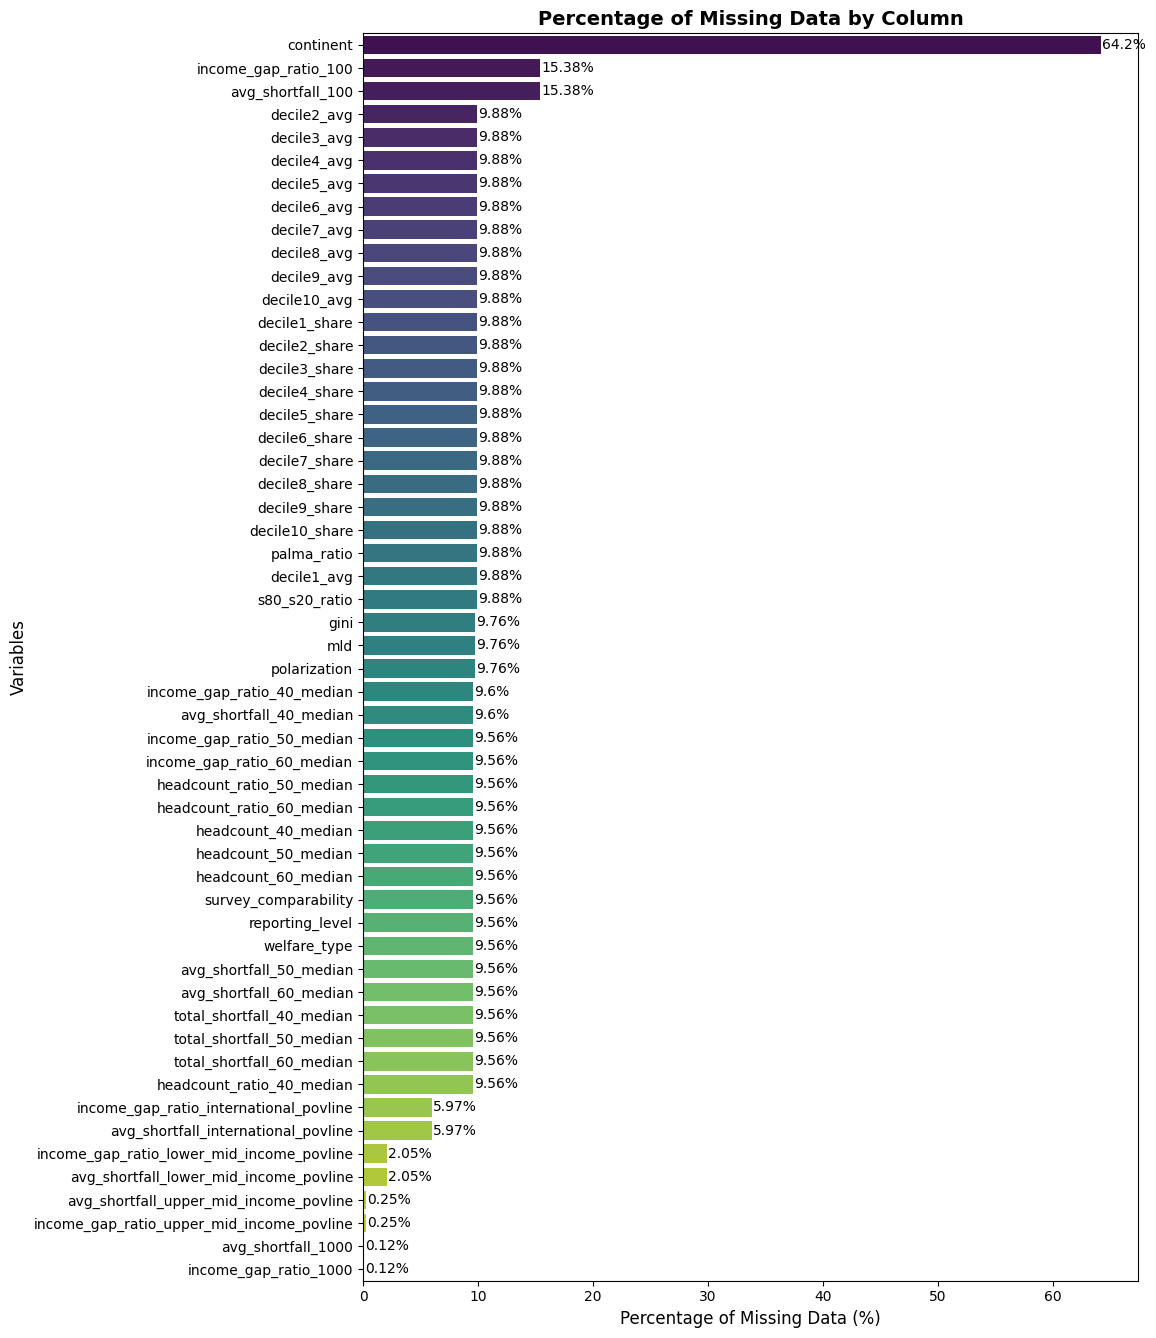

In [89]:
# Calculate percentage of missing data with 2 decimals
missing_percentages = data.isnull().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0].round(2)
missing_table = pd.DataFrame(missing_percentages, columns=["Percentage of Missing Data"])
missing_table = missing_table.sort_values(by="Percentage of Missing Data", ascending=False)

plt.figure(figsize=(10, max(6, len(missing_table) * 0.3)))
sns.barplot(x="Percentage of Missing Data", y=missing_table.index, data=missing_table, palette="viridis")
plt.xlabel("Percentage of Missing Data (%)", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("Percentage of Missing Data by Column", fontsize=14, weight='bold')

# Show percentages in each bar
for index, value in enumerate(missing_table["Percentage of Missing Data"]):
    plt.text(value + 0.1, index, f"{value}%", va='center', fontsize=10)

plt.show()

Eliminar los datos perdidos de los territorios poco claros (Worlwide, High income contries, Latin America and the Caribbean, ... ).

Number of rows with missing values: 482


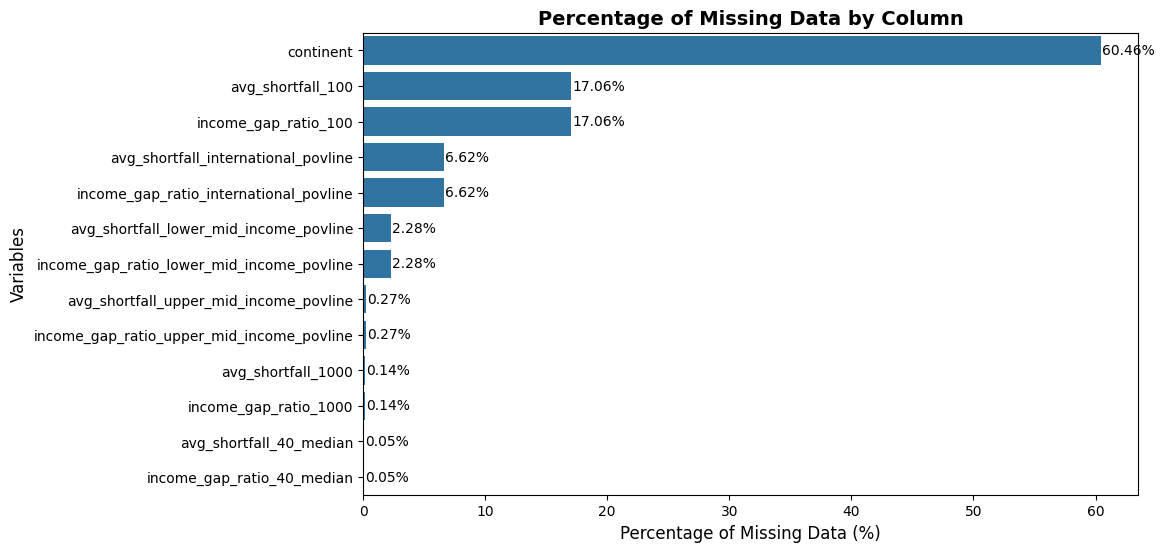

In [90]:
shape_1 = data.shape
data.dropna(subset=['reporting_level', 'welfare_type','decile10_share'], inplace=True)
shape_2 = data.shape
print(f"Number of rows with missing values: {shape_1[0] - shape_2[0]}")

# Calculate percentage of missing data with 2 decimals
missing_percentages = data.isnull().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0].round(2)
missing_table = pd.DataFrame(missing_percentages, columns=["Percentage of Missing Data"])
missing_table = missing_table.sort_values(by="Percentage of Missing Data", ascending=False)

plt.figure(figsize=(10, max(6, len(missing_table) * 0.3)))
sns.barplot(x="Percentage of Missing Data", y=missing_table.index, data=missing_table)
plt.xlabel("Percentage of Missing Data (%)", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.title("Percentage of Missing Data by Column", fontsize=14, weight='bold')

# Show percentages in each bar
for index, value in enumerate(missing_table["Percentage of Missing Data"]):
    plt.text(value + 0.1, index, f"{value}%", va='center', fontsize=10)

plt.show()

Antes de imputar los datos perdidos restantes, solucionamos los outliers. Para facilitar el análisis, creamos diferentes subgrupos de características según su categoría.

In [91]:
data_headcount = data.iloc[:, 8:29]
data_avg_shortfall = data.iloc[:, 29:40]
data_total_shortfall = data.iloc[:, 40:51]
data_income_poverty_gap = data.iloc[:, 51:70]
data_decile = data.iloc[:, 70:100]
data_end = data.iloc[:, 100:109]

datasets = {
    'Headcount': data_headcount,
    'Average_Shortfall': data_avg_shortfall,
    'Total_Shortfall': data_total_shortfall,
    'Income_Poverty_Gap': data_income_poverty_gap,
    'Deciles': data_decile,
    'Inequality_Metrics': data_end
}

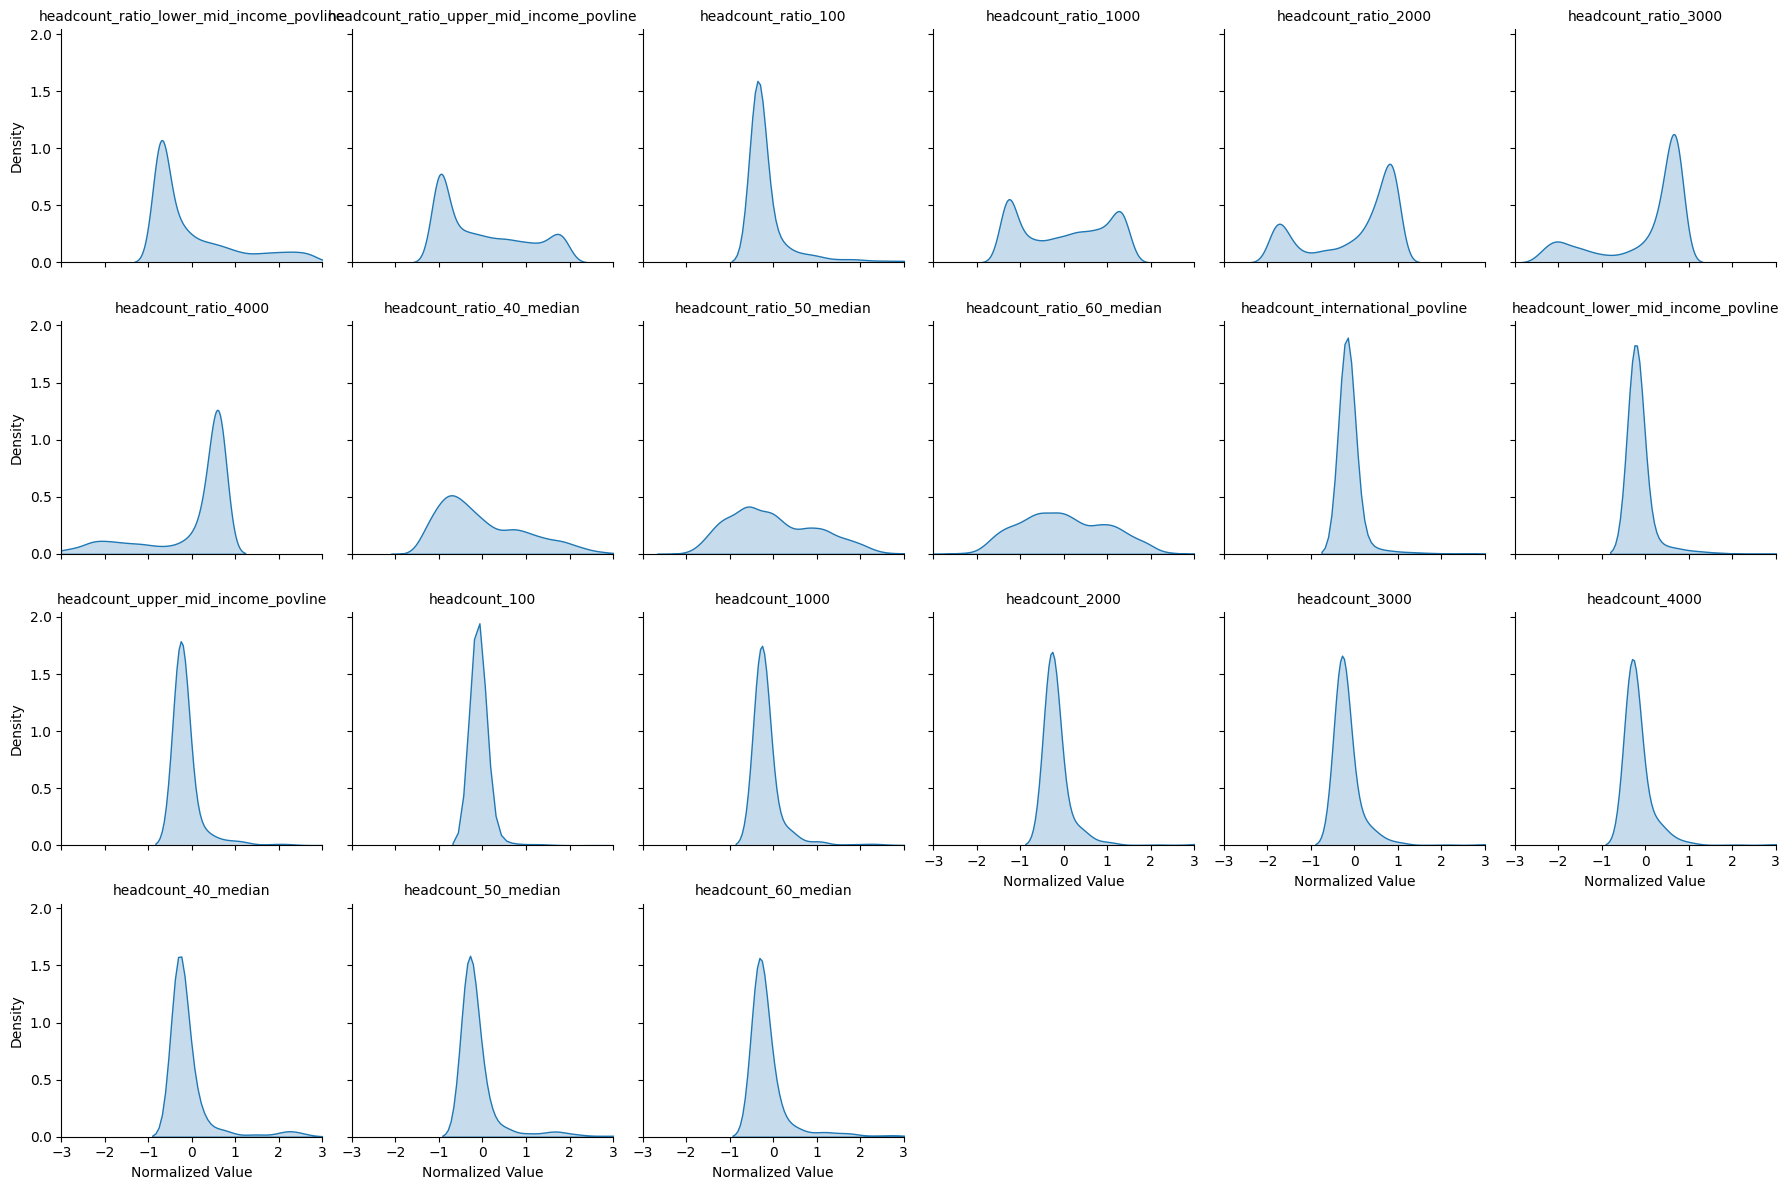

In [92]:
# Normalizar el dataset y transformarlo a formato largo
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data_headcount), columns=data_headcount.columns)
data_melted = data_scaled.melt(var_name='variable', value_name='value')

# Crear el grid de KDE plots
g = sns.FacetGrid(data_melted, col="variable", col_wrap=6, height=3, aspect=1)
g.map(sns.kdeplot, "value", fill=True)

# Ajustar los límites del eje X y layout
g.set(xlim=(-3, 3))  # Ajuste de X para un rango más estrecho si los datos están normalizados
g.set_titles("{col_name}")
g.set_axis_labels("Normalized Value", "Density")
g.tight_layout()
plt.show()

In [93]:
# Function to replace outliers with NaN based on a 99% confidence interval
def replace_outliers_with_nan(df):
    transformed_df = df.copy()
    cells_replaced = 0  # Counter for cells turned to NaN

    for column in transformed_df.select_dtypes(include=[np.number]).columns:
        lower_limit = transformed_df[column].quantile(0.005)
        upper_limit = transformed_df[column].quantile(0.995)
        
        # Count the cells that will be set to NaN
        cells_replaced += transformed_df[(transformed_df[column] < lower_limit) | 
                                         (transformed_df[column] > upper_limit)][column].count()
        
        # Replace outliers with NaN
        transformed_df[column] = transformed_df[column].mask(
            (transformed_df[column] < lower_limit) | (transformed_df[column] > upper_limit), 
            np.nan
        )
        
    return transformed_df, cells_replaced

Outliers set to NaN in 'data': 4074


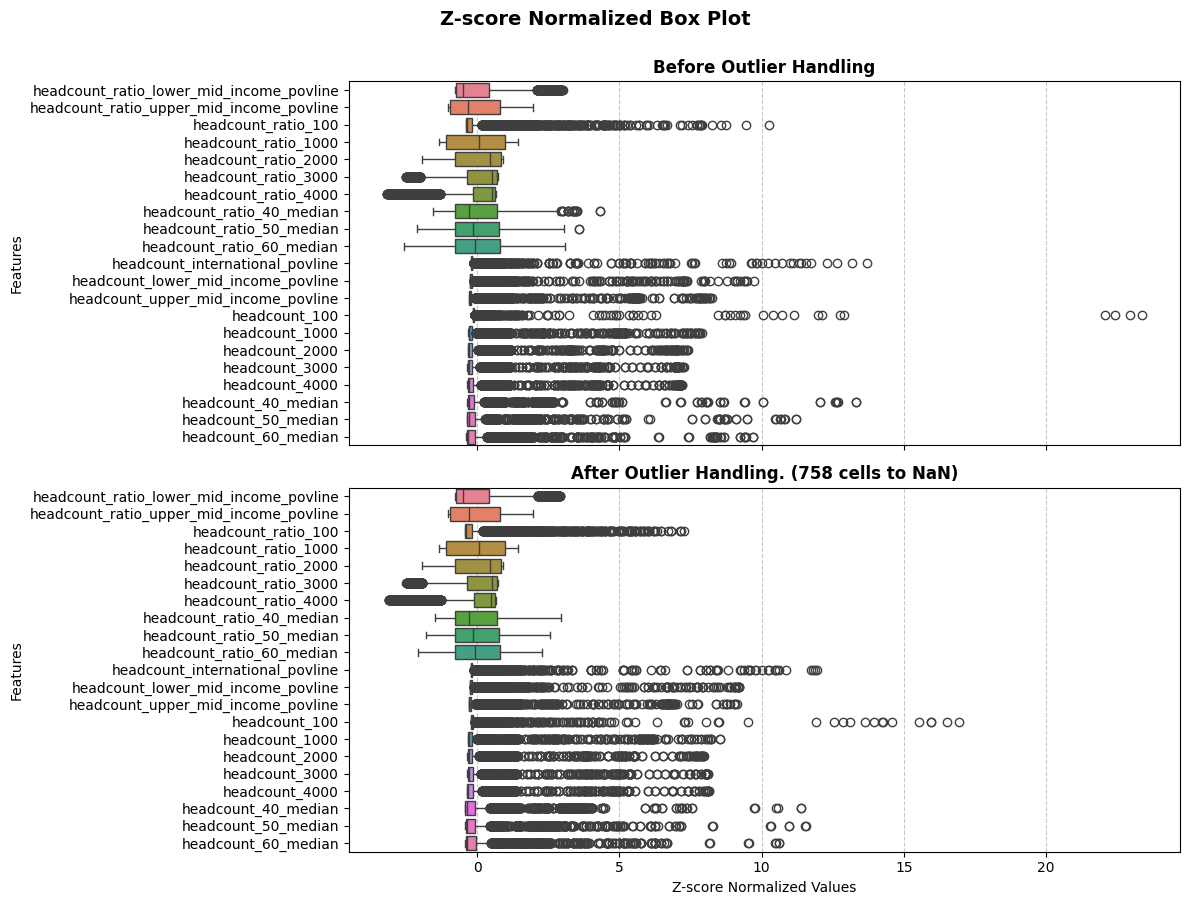

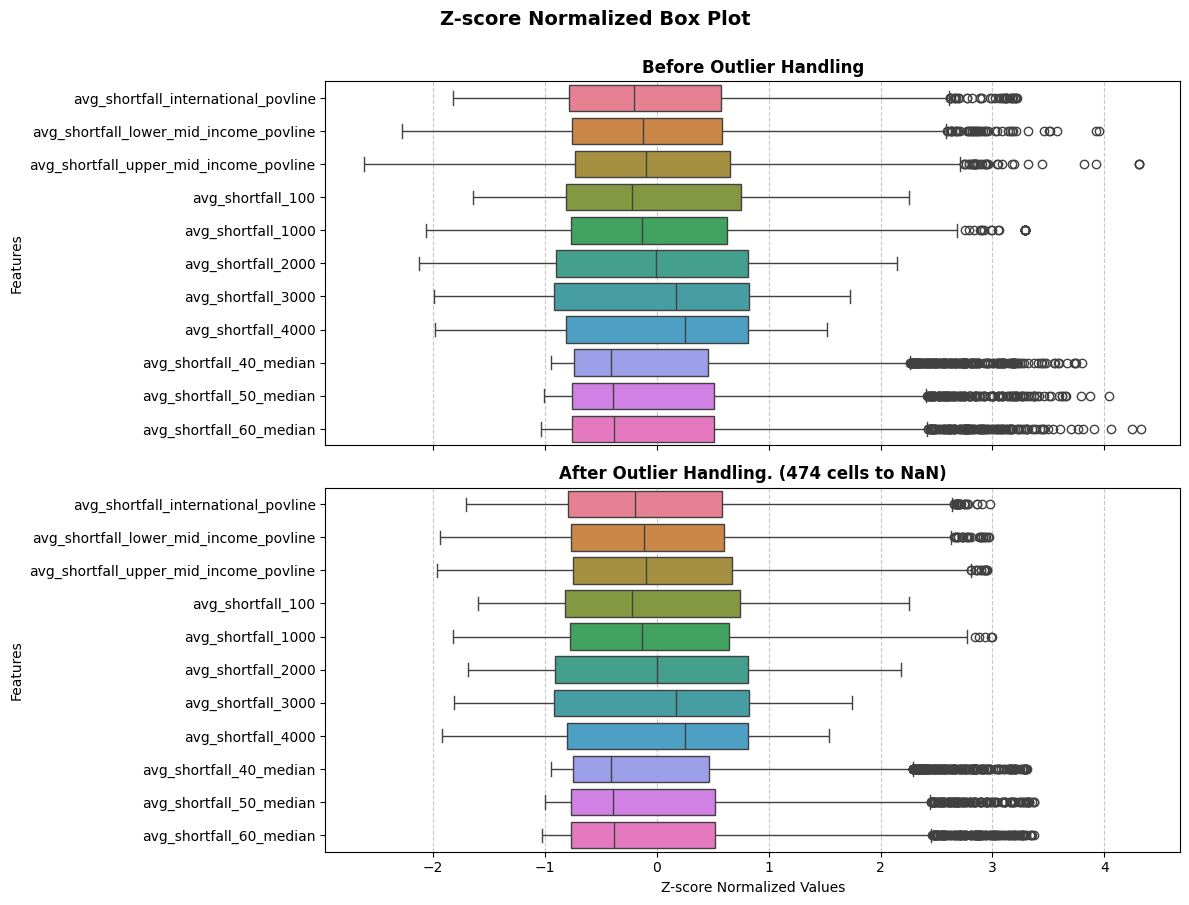

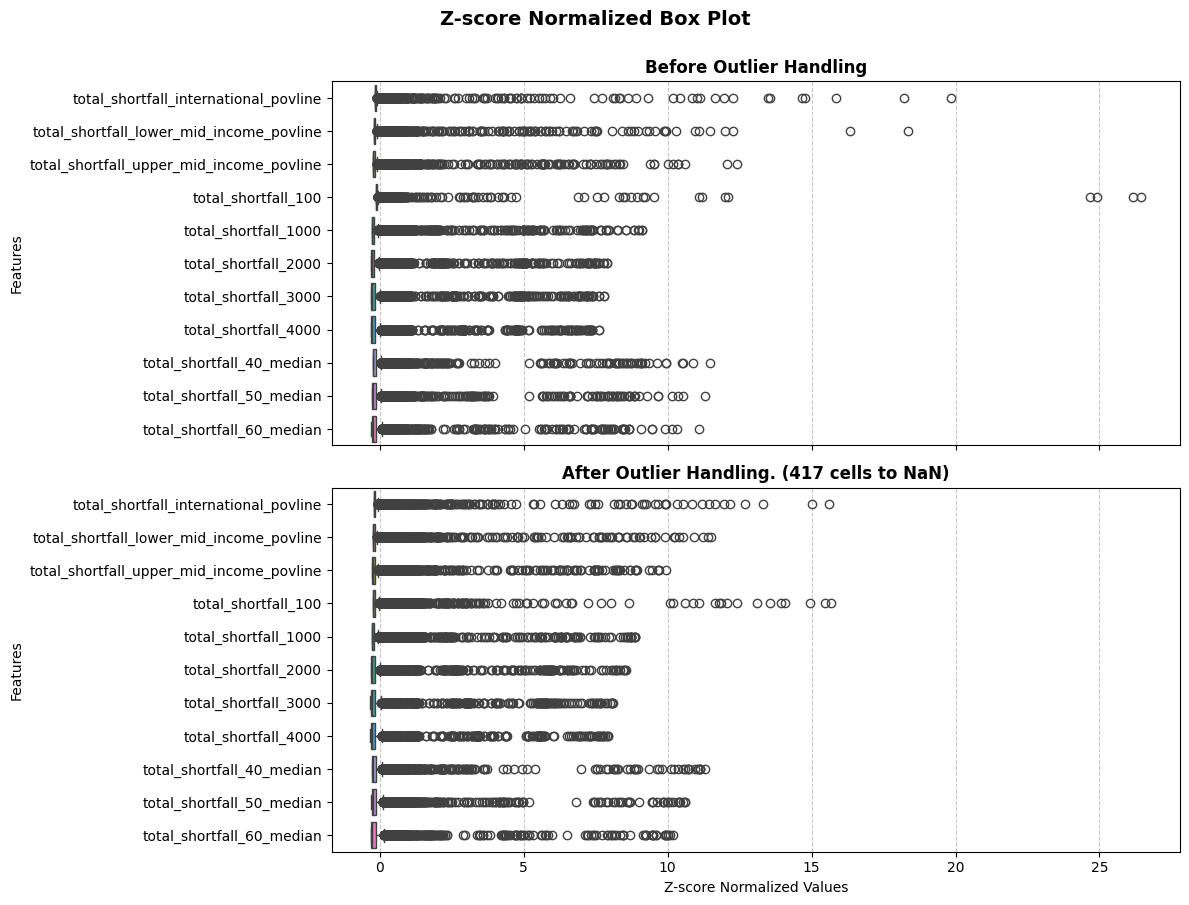

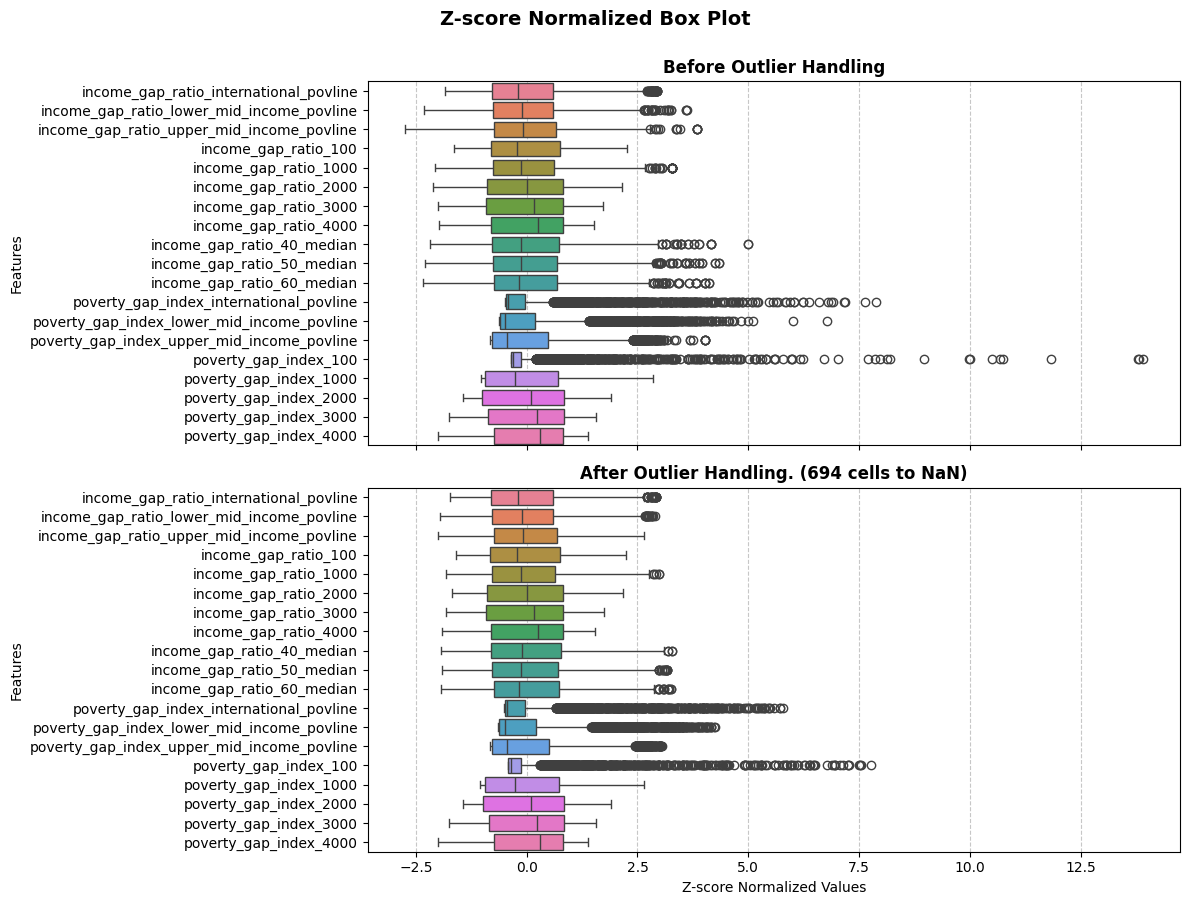

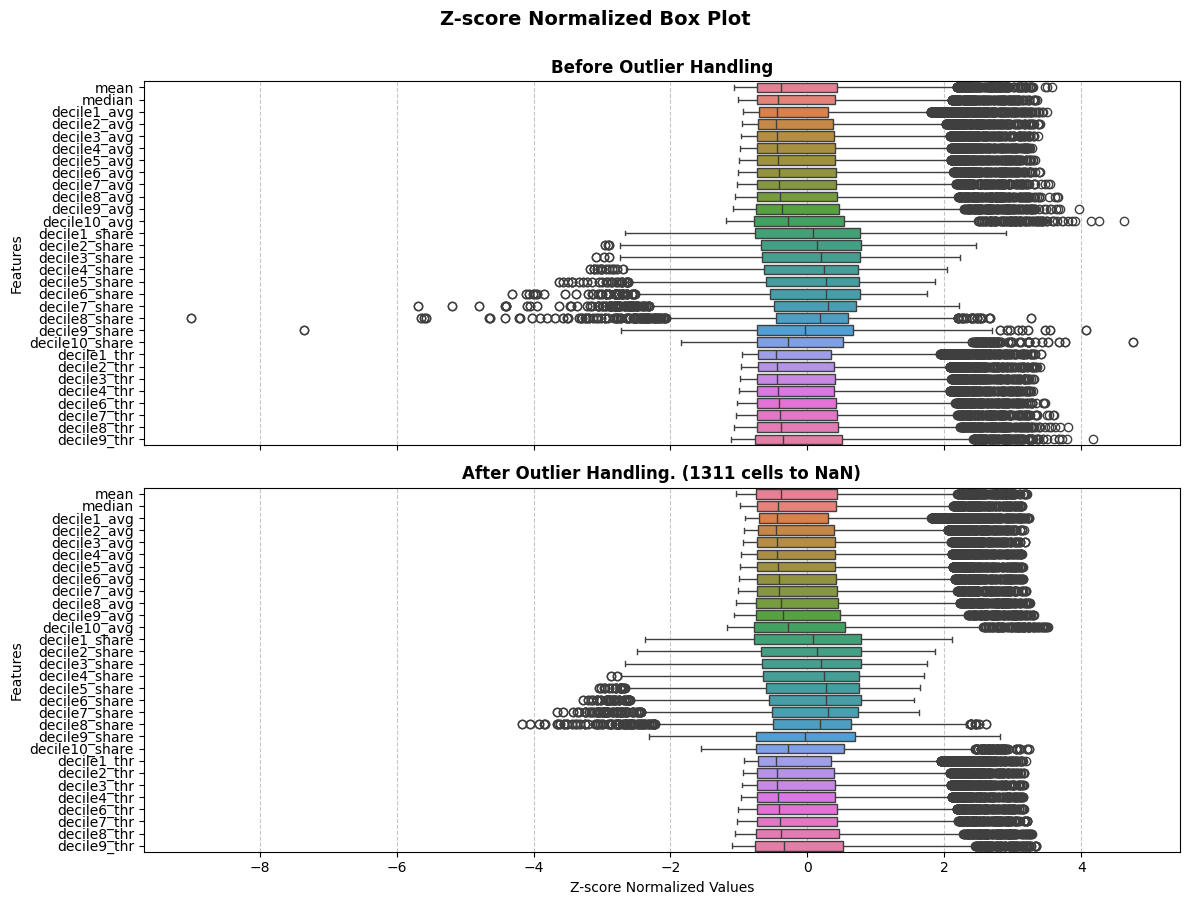

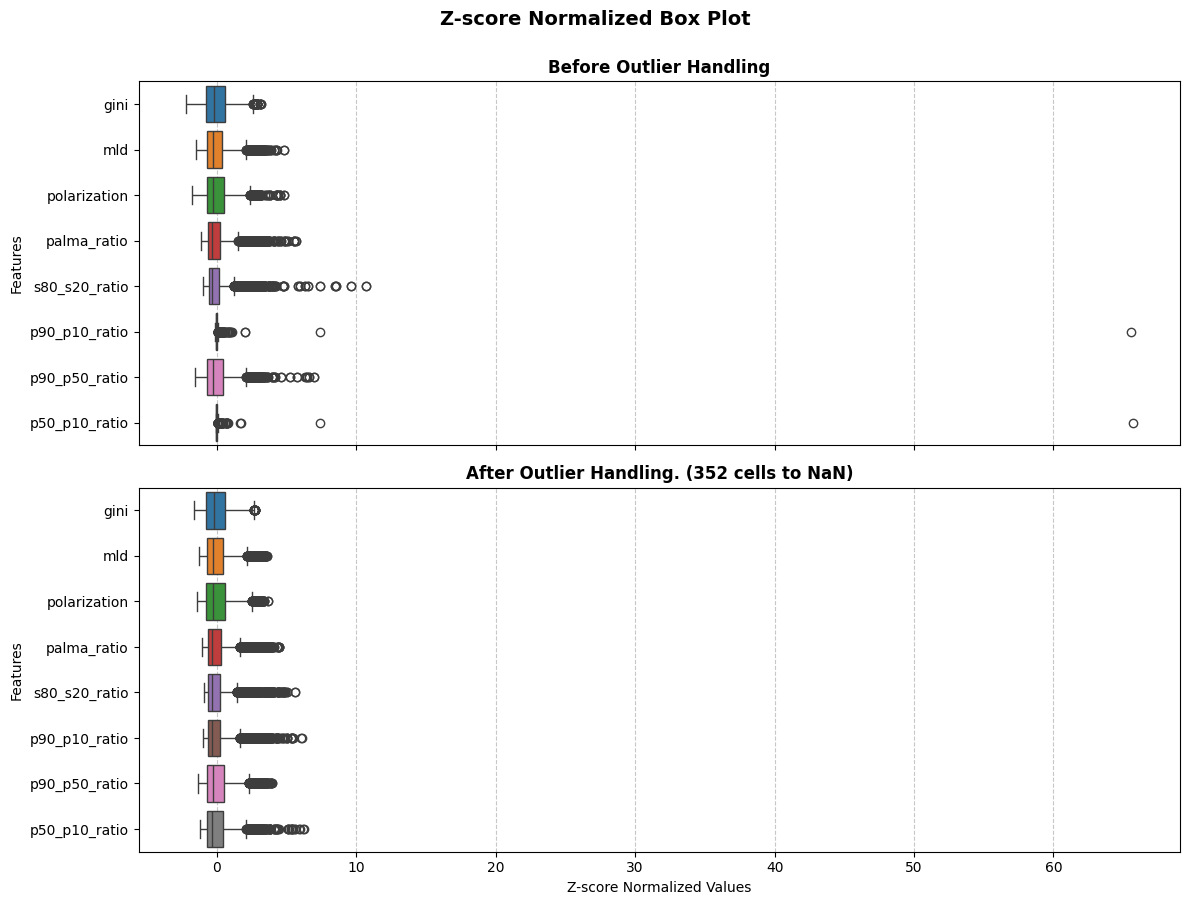

In [94]:
# Apply outlier handling to 'data'
data, data_outliers_replaced = replace_outliers_with_nan(data)

# Display the count of outliers replaced in 'data'
print(f"Outliers set to NaN in 'data': {data_outliers_replaced}")

# Apply outlier handling to each dataset in the dictionary and visualize with Z-score normalization
for name, dataset in datasets.items():
    # Normalize without handling outliers
    normalized_dataset_no_outliers = dataset.apply(zscore, nan_policy='omit')
    
    # Replace outliers with NaN in each dataset and normalize again
    datasets[name], cells_replaced = replace_outliers_with_nan(dataset)
    normalized_dataset_outliers_handled = datasets[name].apply(zscore, nan_policy='omit')
    
    # Create a figure with 2 subplots (one above the other) to compare before and after handling outliers
    fig, axes = plt.subplots(2, 1, figsize=(12, 9), sharex=True)
    
    # Plot Z-score normalized dataset before outlier handling
    sns.boxplot(data=normalized_dataset_no_outliers, orient="h", ax=axes[0])
    axes[0].set_title(f"Before Outlier Handling", fontdict={'weight': 'bold', 'size': 12})
    axes[0].set_xlabel("Z-score Normalized Values")
    axes[0].set_ylabel("Features")
    axes[0].grid(axis='x', linestyle='--', alpha=0.7)
    
    # Plot Z-score normalized dataset after outlier handling
    sns.boxplot(data=normalized_dataset_outliers_handled, orient="h", ax=axes[1])
    axes[1].set_title(f"After Outlier Handling. ({cells_replaced} cells to NaN)", fontdict={'weight': 'bold', 'size': 12})
    axes[1].set_xlabel("Z-score Normalized Values")
    axes[1].set_ylabel("Features")
    axes[1].grid(axis='x', linestyle='--', alpha=0.7)

    
    # Adjust the layout and add suptitle
    plt.suptitle(f"Z-score Normalized Box Plot", y=1, fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

Imputar con MICE regresión lineal los missing restantes

In [95]:
# Solve numerical missing data
imputer = IterativeImputer(estimator=LinearRegression(), random_state=1, max_iter=10)
data[feat_num] = imputer.fit_transform(data[feat_num])
data = data.reset_index(drop=True)

data_headcount = data.iloc[:, 6:28]
data_avg_shortfall = data.iloc[:, 28:39]
data_total_shortfall = data.iloc[:, 39:50]
data_income_poverty_gap = data.iloc[:, 50:69]
data_decile = data.iloc[:, 69:99]
data_end = data.iloc[:, 99:108]

datasets = {
    'Headcount': data_headcount,
    'Average_Shortfall': data_avg_shortfall,
    'Total_Shortfall': data_total_shortfall,
    'Income_Poverty_Gap': data_income_poverty_gap,
    'Deciles': data_decile,
    'Inequality_Metrics': data_end
}

### 3. Análisis de correlaciones y reducción de la dimensionalidad <a class="anchor" id="seccion_3"></a>


Realizar un análisis de correlaciones y obtener un gráfico de pareto tras PCA por subgrupos.

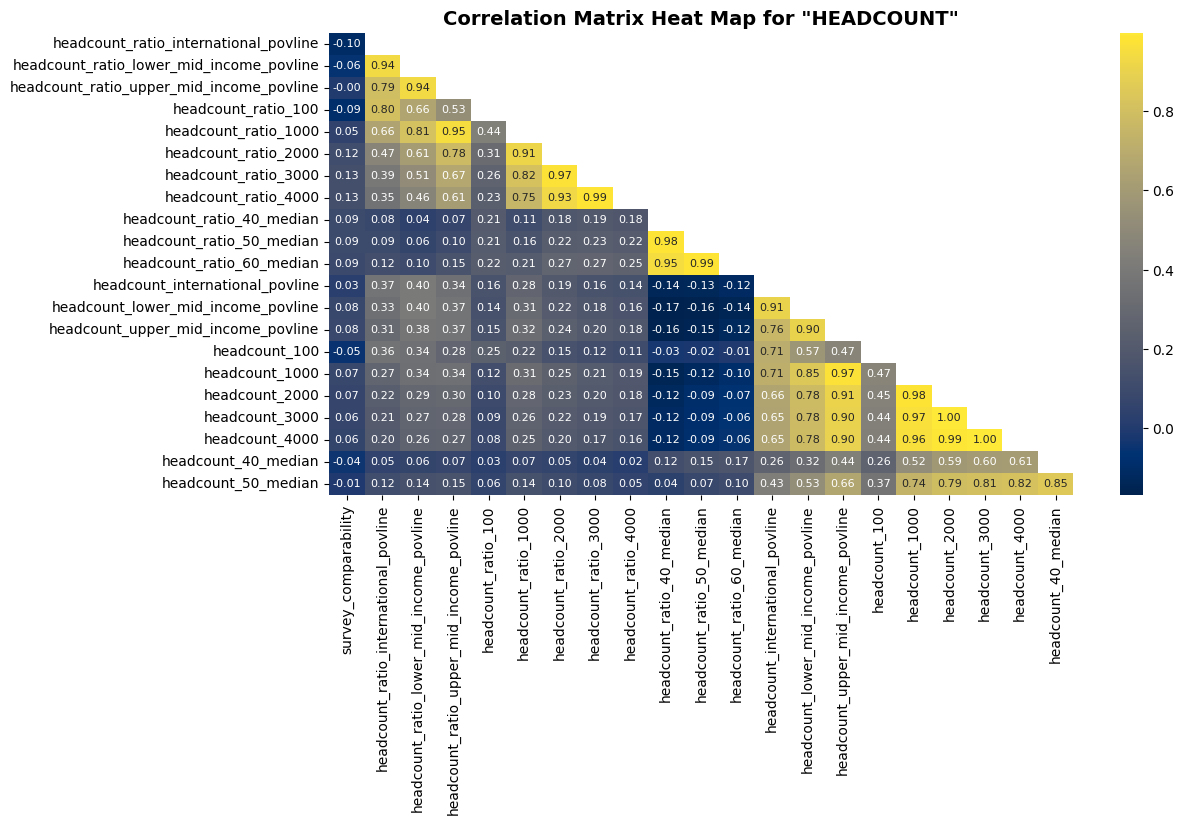

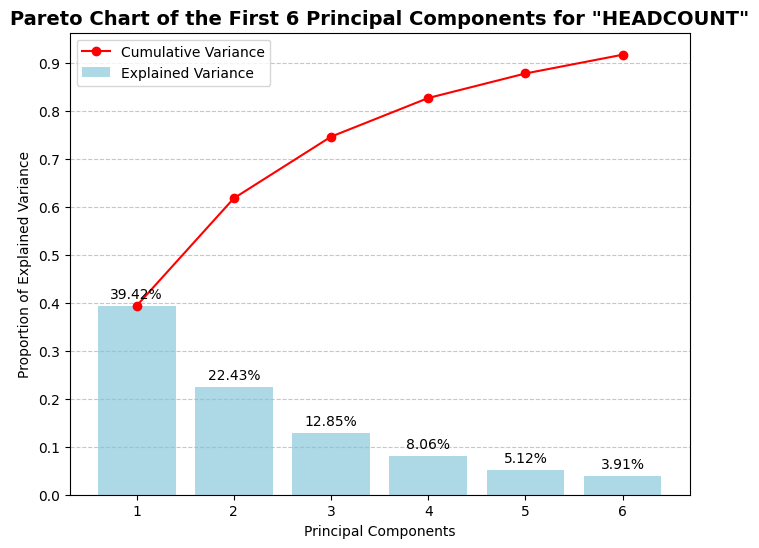

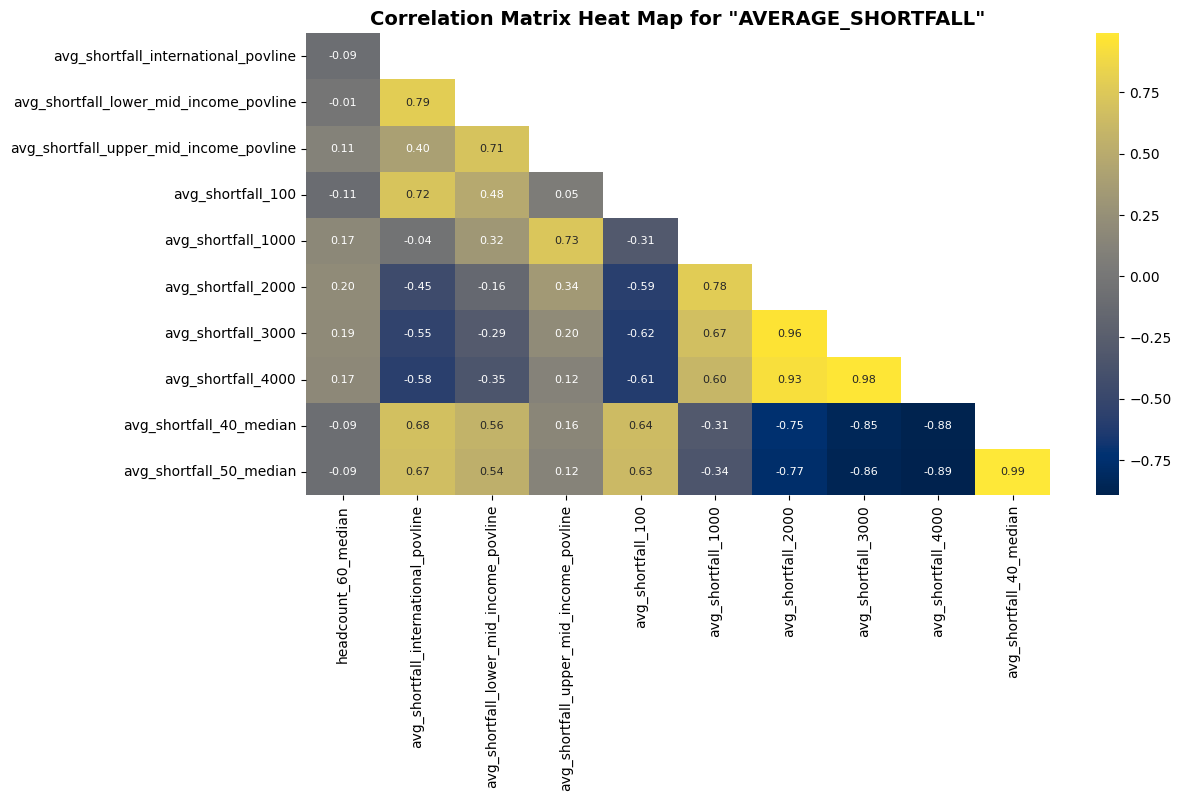

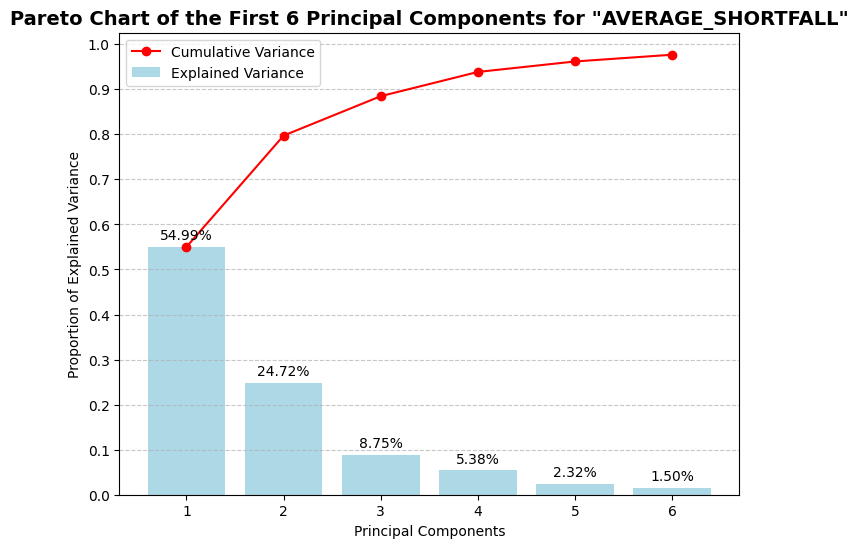

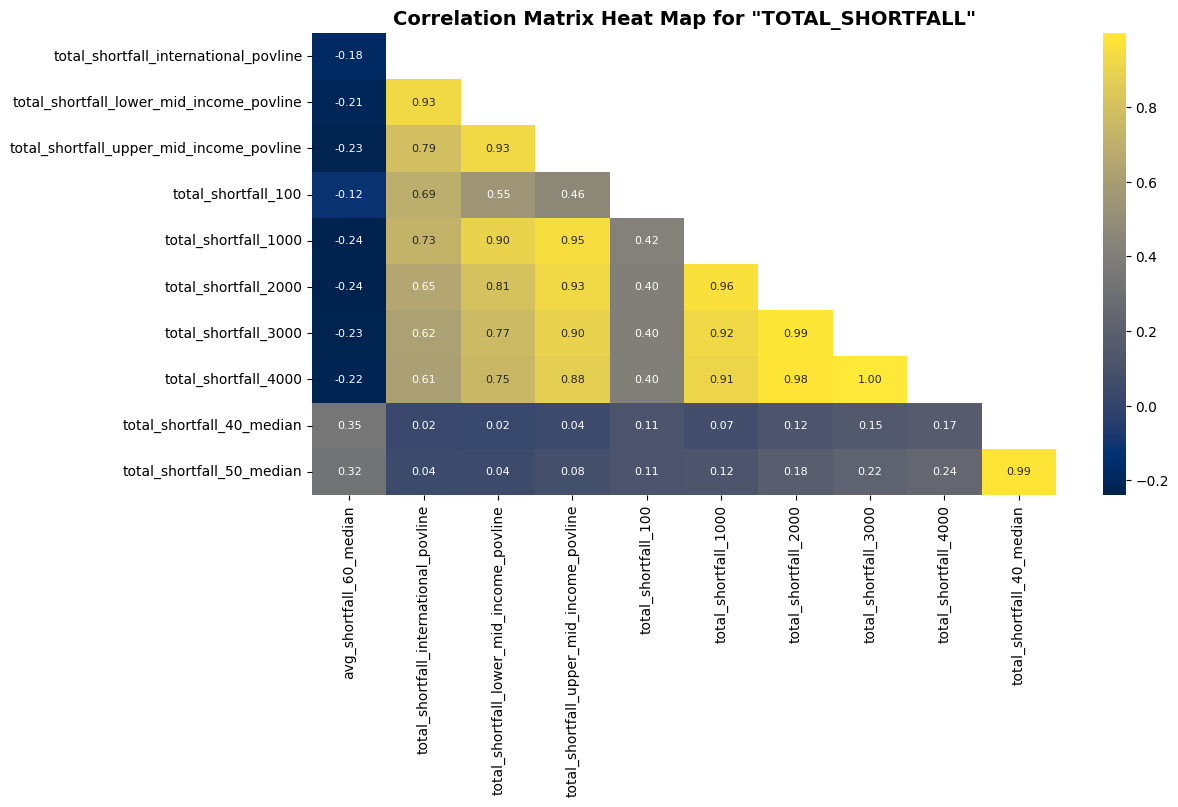

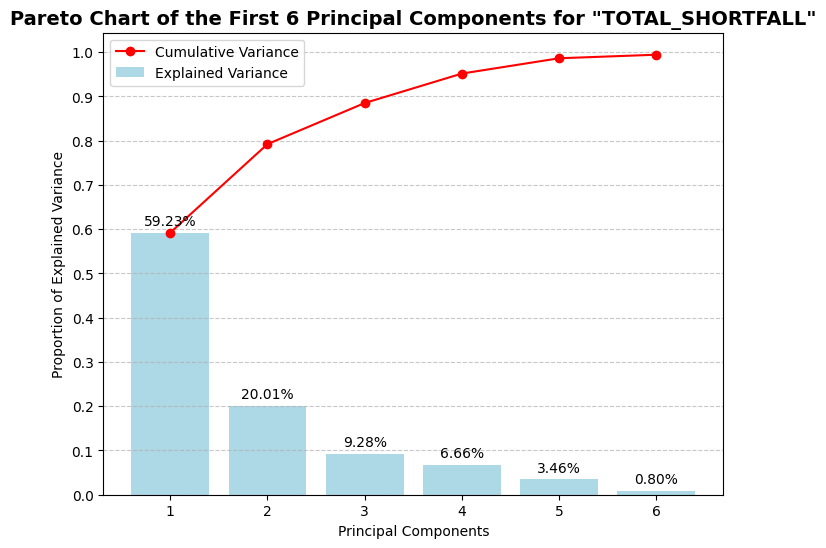

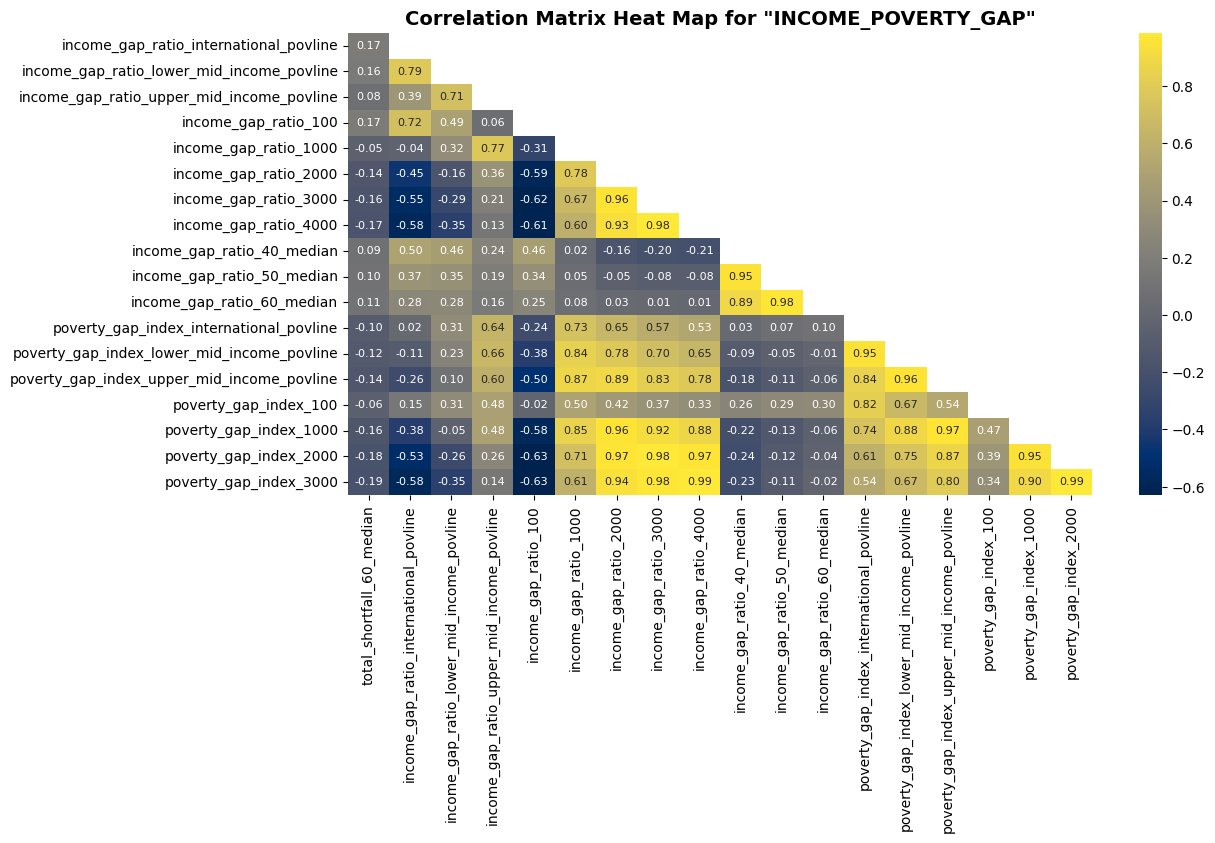

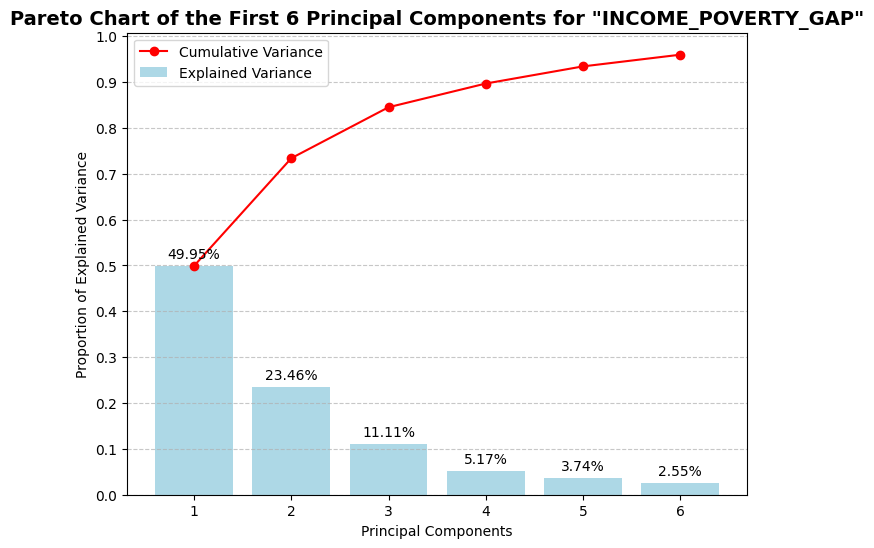

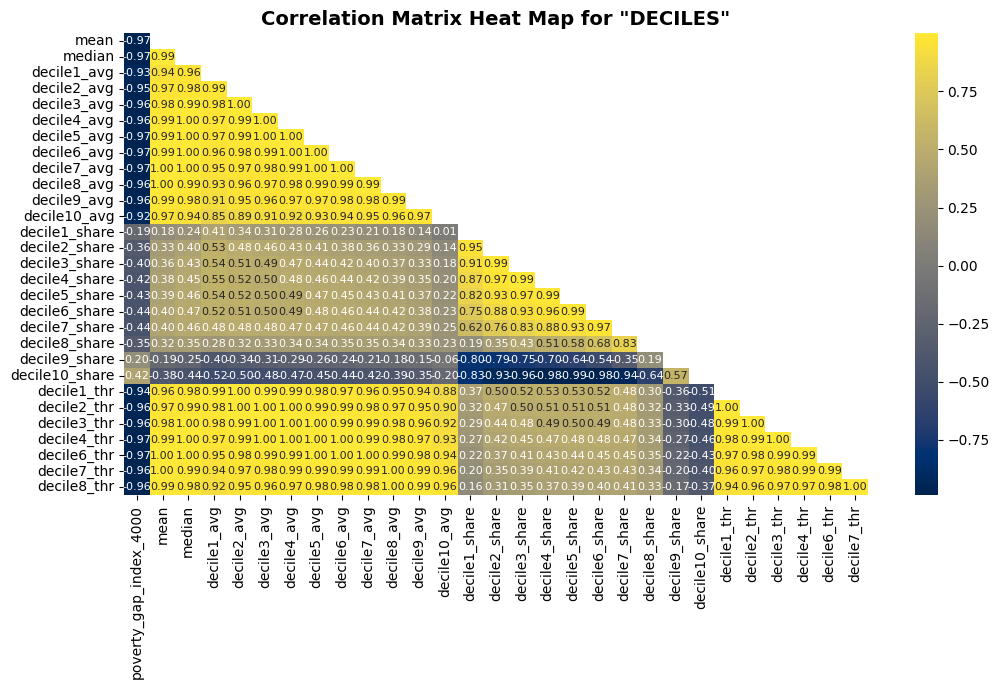

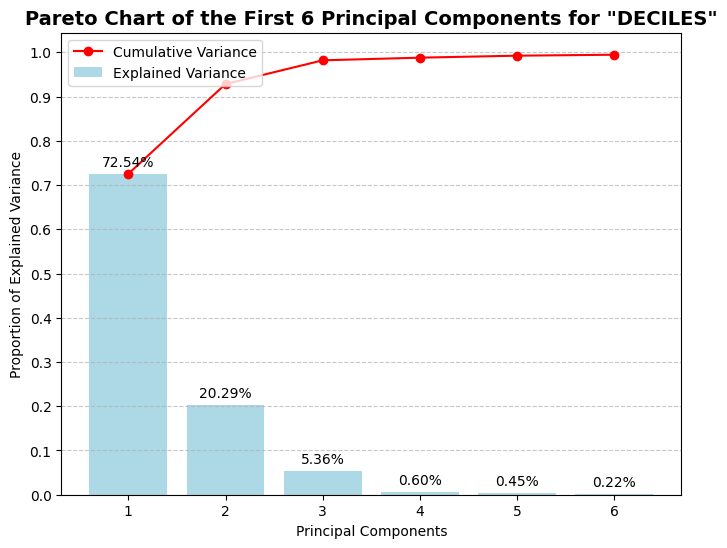

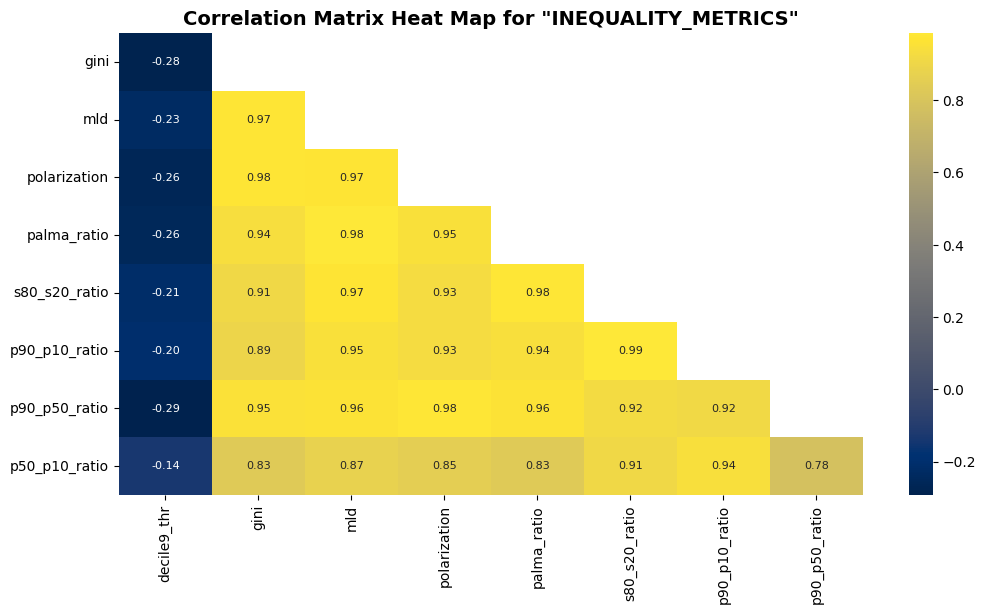

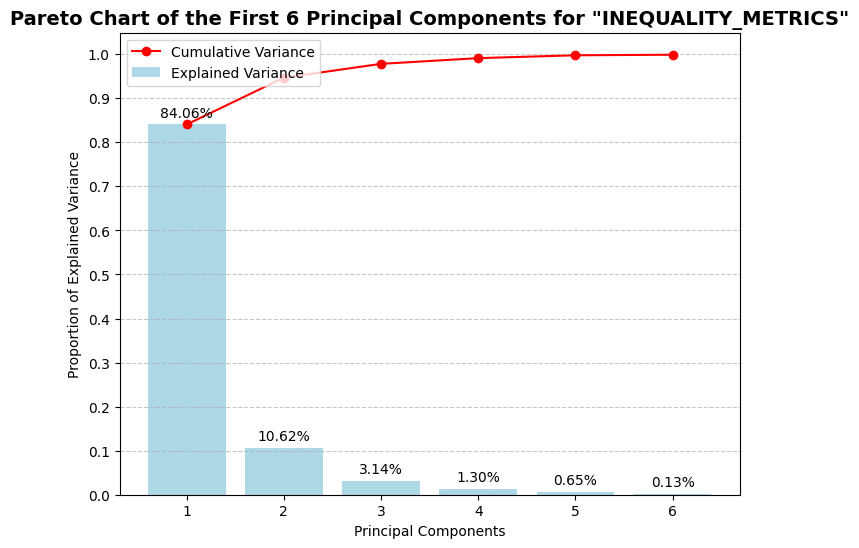

In [ ]:
dataset_PCA = data.iloc[:, :7]

for name, dataset in datasets.items():

    ## CORRELATION MATRIX HEAT MAP
    corr_num = dataset.corr()
    mask = np.triu(np.ones_like(corr_num, dtype=bool)) # A mask to hide the upper right part of the matrix (it is duplicated)

    plt.figure(figsize=(12, 6))
    sns.heatmap(corr_num.iloc[1:, :-1], mask=mask[1:, :-1], annot=True, fmt=".2f", cmap="cividis", annot_kws={"size": 8})
    plt.title(f'Correlation Matrix Heat Map for "{name.upper()}"', fontdict={'fontsize': 14, 'weight': 'bold'})
    plt.show()

    ## PCA & PARETO CHART
    # Standarise using Z-score
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(dataset)

    pca = PCA()
    pca_data = pca.fit_transform(data_standardized)
    explained_variance = pca.explained_variance_ratio_

    # Select the first N components
    n_components = 6
    explained_variance_N = explained_variance[:n_components]
    cumulative_variance_N = np.cumsum(explained_variance_N)

    # Pareto Chart
    plt.figure(figsize=(8, 6))
    components = np.arange(1, n_components+1)

    # Explained and cumulative variance
    plt.bar(components, explained_variance_N, color='lightblue', label="Explained Variance")
    plt.plot(components, cumulative_variance_N, marker='o', color='r', label="Cumulative Variance")

    plt.xlabel("Principal Components")
    plt.ylabel("Proportion of Explained Variance")
    plt.title(f'Pareto Chart of the First {n_components} Principal Components for "{name.upper()}"', fontdict={'fontsize': 14, 'weight': 'bold'})

    # Alabels with the percentage variability
    for i in range(len(components)):
        plt.text(components[i], explained_variance_N[i] + 0.01, f"{explained_variance_N[i]:.2%}", ha='center', va='bottom', fontsize=10)
    
    plt.xticks(components)
    plt.legend(loc='upper left', title_fontsize='medium', prop={'size': 10})
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))  # Set grid lines every 0.1 on the y-axis
    plt.show()

    # Select and store the minimum number of components needed to reach 90% cumulative variance
    n_components_90 = np.argmax(cumulative_variance_N >= 0.90) + 1  # Number of components needed for 90%
    pca_columns = [f"{name}_PCA{i+1}" for i in range(n_components_90)]
    dataset_PCA_subset = pd.DataFrame(pca_data[:, :n_components_90], columns=pca_columns)
    dataset_PCA = pd.concat([dataset_PCA, dataset_PCA_subset], axis=1)

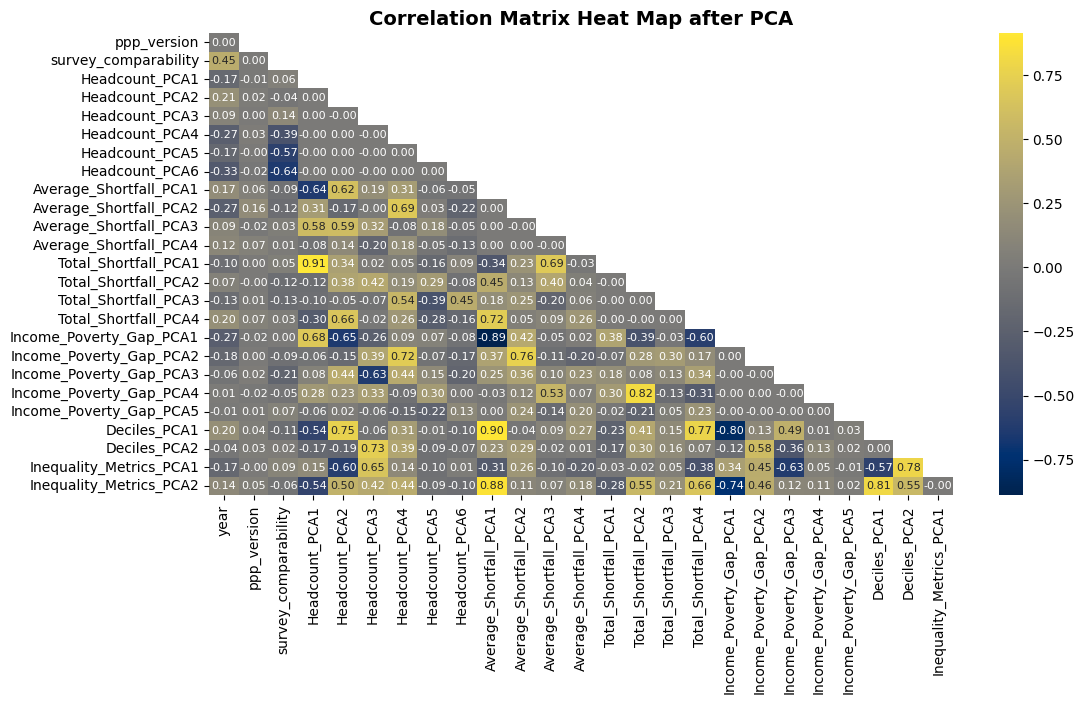

In [ ]:
dataset_PCA
feat_names = dataset_PCA.columns
feat_num = [feat for feat in feat_names if feat not in feat_cat]

## CORRELATION MATRIX HEAT MAP
corr_num = dataset_PCA[feat_num].corr()
mask = np.triu(np.ones_like(corr_num, dtype=bool)) # A mask to hide the upper right part of the matrix (it is duplicated)

plt.figure(figsize=(12, 6))
sns.heatmap(corr_num.iloc[1:, :-1], mask=mask[1:, :-1], annot=True, fmt=".2f", cmap="cividis", annot_kws={"size": 8})
plt.title(f'Correlation Matrix Heat Map after PCA', fontdict={'fontsize': 14, 'weight': 'bold'})
plt.show()

In [ ]:
dataset_PCA

country continent    year reporting_level welfare_type  ppp_version  \
0      Albania    Europe  1996.0        national  consumption       2011.0   
1      Albania    Europe  2002.0        national  consumption       2011.0   
2      Albania    Europe  2005.0        national  consumption       2011.0   
3      Albania    Europe  2008.0        national  consumption       2011.0   
4      Albania    Europe  2012.0        national  consumption       2011.0   
...        ...       ...     ...             ...          ...          ...   
4390    Zambia    Africa  2006.0        national  consumption       2017.0   
4391    Zambia    Africa  2010.0        national  consumption       2017.0   
4392    Zambia    Africa  2015.0        national  consumption       2017.0   
4393  Zimbabwe       NaN  2011.0        national  consumption       2017.0   
4394  Zimbabwe       NaN  2017.0        national  consumption       2017.0   

      survey_comparability  Headcount_PCA1  Headcount_PCA2  Headcount_PCA3  \
0                      0.0       -0.329877       -0.587777       -1.911422   
1                      1.0       -0.260413       -0.755961       -1.681639   
2                      1.0       -0.428510       -0.649182       -1.370595   
3                      1.0       -0.559668       -0.242710       -1.841297   
4                      1.0       -0.500741       -0.426041       -1.640885   
...                    ...             ...             ...             ...   
4390                   3.0        2.467723       -5.168212        0.183826   
4391                   4.0        2.626481       -4.948006       -0.604281   
4392                   4.0        2.528677       -5.435087        1.210251   
4393                   0.0        0.651022       -2.376115       -0.337878   
4394                   0.0        1.049475       -2.371778       -1.554144   

      ...  Total_Shortfall_PCA4  Income_Poverty_Gap_PCA1  \
0     ...             -0.633229                 1.365823   
1     ...             -0.632832                 1.180861   
2     ...             -0.578545                 0.791897   
3     ...             -0.594710                 0.467960   
4     ...             -0.566649                 0.792706   
...   ...                   ...                      ...   
4390  ...             -0.954898                 7.141453   
4391  ...             -0.988981                 7.425299   
4392  ...             -1.025925                 6.871662   
4393  ...             -0.640599                 3.327567   
4394  ...             -0.697344                 4.257052   

      Income_Poverty_Gap_PCA2  Income_Poverty_Gap_PCA3  \
0                   -3.320952                -0.077083   
1                   -2.631690                -0.084774   
2                   -2.793142                -0.352160   
3                   -3.370720                -0.097060   
4                   -2.974155                -0.578826   
...                       ...                      ...   
4390                 4.816271                 1.519221   
4391                 4.388925                 2.281802   
4392                 5.452344                 0.754924   
4393                -1.331013                 0.592166   
4394                -1.038066                 1.626081   

      Income_Poverty_Gap_PCA4  Income_Poverty_Gap_PCA5  Deciles_PCA1  \
0                    0.045036                 0.011724     -1.576269   
1                    0.012130                 0.073300     -2.260996   
2                   -0.046160                -0.097389     -1.845549   
3                   -0.141488                -0.393225     -1.644508   
4                   -0.063041                -0.082578     -1.550921   
...                       ...                      ...           ...   
4390                -1.380869                -3.081287     -6.227910   
4391                -1.383689                -3.155398     -6.503828   
4392                -1.477495                -3.272575     -6.46705

c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


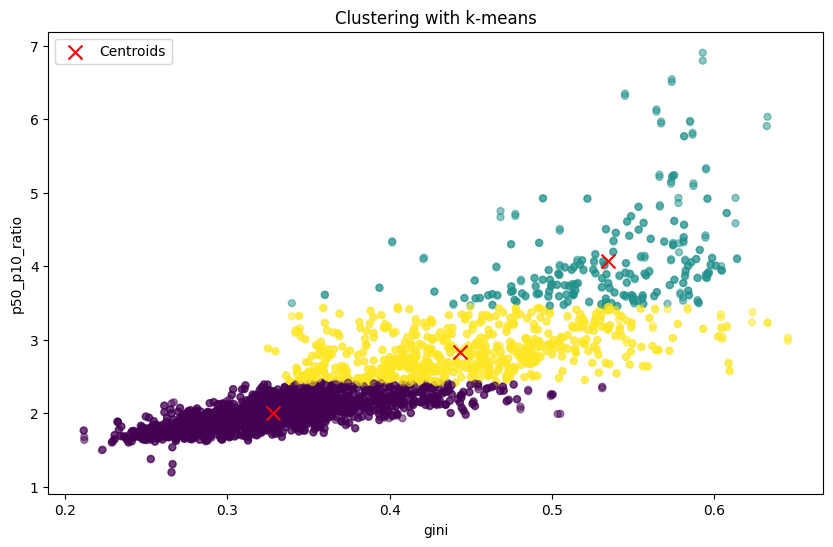

In [ ]:
# Supongamos que tu dataset se llama 'df' y tiene las columnas 'Inequality Metrics_PCA1' y 'PCA2'
# df = pd.read_csv("tu_archivo.csv")  # Carga el dataset (descomenta si necesitas cargarlo desde un archivo)

# Si los datos ya están en 'df', seleccionamos las columnas relevantes
X = data[['gini', 'p50_p10_ratio']]

# Definimos el número de clusters (por ejemplo, k = 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
dataset_PCA['Cluster'] = kmeans.fit_predict(X)  # Realizamos el clustering y asignamos las etiquetas al dataset

# Visualizamos el scatter plot con los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['gini'], data['p50_p10_ratio'], c=dataset_PCA['Cluster'], cmap='viridis', s=25, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("Clustering with k-means")
plt.xlabel("gini")
plt.ylabel("p50_p10_ratio")
plt.legend()
plt.show()

In [ ]:
columns_delete = ["Headcount_PCA1","Average_Shortfall_PCA1"]

In [ ]:
feat_names = data.columns
feat_cat = [feat_names[0]] + list(feat_names[2:4])
feat_num = [feat for feat in feat_names if feat not in feat_cat]
dataset = data[feat_num]
dataset = dataset.iloc[:, :-8]
dataset

continent welfare_type  ppp_version  survey_comparability  \
0       Europe  consumption       2011.0                   0.0   
1       Europe  consumption       2011.0                   1.0   
2       Europe  consumption       2011.0                   1.0   
3       Europe  consumption       2011.0                   1.0   
4       Europe  consumption       2011.0                   1.0   
...        ...          ...          ...                   ...   
4390    Africa  consumption       2017.0                   3.0   
4391    Africa  consumption       2017.0                   4.0   
4392    Africa  consumption       2017.0                   4.0   
4393       NaN  consumption       2017.0                   0.0   
4394       NaN  consumption       2017.0                   0.0   

      headcount_ratio_international_povline  \
0                                  0.920669   
1                                  1.570843   
2                                  0.860527   
3                                  0.313650   
4                                  0.849754   
...                                     ...   
4390                              64.698028   
4391                              68.456606   
4392                              61.352160   
4393                              21.580063   
4394                              34.206046   

      headcount_ratio_lower_mid_income_povline  \
0                                    11.174149   
1                                    14.132118   
2                                     8.715685   
3                                     5.250542   
4                                     6.182414   
...                                        ...   
4390                                 81.165271   
4391                                 82.885088   
4392                                 77.548045   
4393                                 47.857143   
4394                                 61.583570   

      headcount_ratio_upper_mid_income_povline  headcount_ratio_100  \
0                                    44.618417             0.057416   
1                                    49.669635             0.046371   
2                                    38.545254             0.027620   
3                                    31.110345             0.000000   
4                                    34.528906             0.111321   
...                                        ...                  ...   
4390                                 92.573347            33.916066   
4391                                 93.044964            36.476496   
4392                                 90.747141            34.330914   
4393                                 77.945113             0.351729   
4394                                 84.109019             2.398895   

      headcount_ratio_1000  headcount_ratio_2000  ...  decile9_share  \
0                86.175208             99.632079  ...      14.899548   
1                85.338317             98.080061  ...      14.925078   
2                79.987127             97.576598  ...      14.833943   
3                75.851021             97.099785  ...      14.535204   
4                77.069840             97.772626  ...      14.889137   
...                    ...                   ...  ...            ...   
4390             96.002132             99.070190  ...      16.306544   
4391             96.299710             99.003962  ...      15.817647   
4392             95.074710             98.777883  ...      16.886786   
4393             88.905316             97.352365  ...      15.834337   
4394             92.461215             98.468333  ...      16.303905   

      decile10_share  decile1_thr  decile2_thr  decile3_thr  decile4_thr  \
0          21.215573         3.06         3.88         4.48         5.16   
1          25.435637         2.91         3.62         4.22         4.85   
2          24.341168         3.30         4.18         4.93         5.63   
3          24.458311    

ANÁLISIS GLOBAL DE CORRELACIONES + PCA

In [ ]:

## CORRELATION MATRIX HEAT MAP
corr_num = dataset.corr()
mask = np.triu(np.ones_like(corr_num, dtype=bool)) # A mask to hide the upper right part of the matrix (it is duplicated)

plt.figure(figsize=(18, 10))  # Aumenta el tamaño del gráfico para acomodar más etiquetas
sns.heatmap(corr_num.iloc[1:, :-1], mask=mask[1:, :-1], annot=False, fmt=".2f", cmap="cividis", annot_kws={"size": 5})

# Configuración del título
plt.title('Correlation Matrix Heat Map', fontdict={'fontsize': 12, 'weight': 'bold'})

# Ajustar etiquetas de los ejes
plt.xticks(rotation=90, fontsize=10)  # Rotar las etiquetas del eje X y reducir el tamaño de fuente
plt.yticks(fontsize=10)  # Reducir el tamaño de fuente de las etiquetas del eje Y

plt.show()

## PCA & PARETO CHART
# Standarise using Z-score
scaler = StandardScaler()
data_standardized = scaler.fit_transform(dataset)

pca = PCA()
pca_data = pca.fit_transform(data_standardized)
explained_variance = pca.explained_variance_ratio_

# Select the first N components
n_components = 12
explained_variance_N = explained_variance[:n_components]
cumulative_variance_N = np.cumsum(explained_variance_N)

# Pareto Chart
plt.figure(figsize=(8, 6))
components = np.arange(1, n_components+1)

# Explained and cumulative variance
plt.bar(components, explained_variance_N, color='lightblue', label="Explained Variance")
plt.plot(components, cumulative_variance_N, marker='o', color='r', label="Cumulative Variance")

plt.xlabel("Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.title(f'Pareto Chart of the First {n_components} Principal Components', fontdict={'fontsize': 14, 'weight': 'bold'})

# Alabels with the percentage variability
for i in range(len(components)):
    plt.text(components[i], explained_variance_N[i] + 0.01, f"{explained_variance_N[i]:.2%}", ha='center', va='bottom', fontsize=10)

plt.xticks(components)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))  # Set grid lines every 0.1 on the y-axis
plt.show()

# Select and store the minimum number of components needed to reach 90% cumulative variance
n_components_90 = np.argmax(cumulative_variance_N >= 0.90) + 1  # Number of components needed for 90%
pca_columns = [f"{name}_PCA{i+1}" for i in range(n_components_90)]
dataset_PCA_subset = pd.DataFrame(pca_data[:, :n_components_90], columns=pca_columns)
dataset_PCA = pd.concat([dataset_PCA, dataset_PCA_subset], axis=1)

ValueError: could not convert string to float: 'Europe'